In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation import metrics, get_tester
from neuralhydrology.nh_run import start_run
from neuralhydrology.utils.config import Config

In [302]:
import yaml
from pathlib import Path

config_dict = {
    'experiment_name': 'test_run',
    'use_frequencies': ['1h', '1D'],
    'train_basin_file': "D:/DATN/Cam_le_dataset/basin.txt",
    'validation_basin_file': "D:/DATN/Cam_le_dataset/basin.txt",
    'test_basin_file': "D:/DATN/Cam_le_dataset/basin.txt",
    'train_start_date': "01/01/2024",
    'train_end_date': "31/12/2024",
    'validation_start_date': "01/01/2023",
    'validation_end_date': "30/06/2023",
    'test_start_date': "01/07/2023",
    'test_end_date': "31/12/2023",
    'device': 'cpu',
    'validate_every': 5,
    'validate_n_random_basins': 1,
    'metrics': ['MSE','NSE'],
    'model': 'mtslstm',
    'shared_mtslstm': False,
    'target_loss_weights': [100.0],
    'transfer_mtslstm_states': {
        'h': 'linear',
        'c': 'linear'
    },
    'head': 'regression',
    'output_activation': 'linear',
    'hidden_size': 128,
    'initial_forget_bias': 2.0,
    'output_dropout': 0.0,
    'optimizer': 'Adam',
    'loss': 'MSE',
    'learning_rate': {
        0: 1e-2,
        30: 5e-3,
        40: 1e-3
    },
    'batch_size': 256,
    'epochs': 200,
    'clip_gradient_norm': 2.0,
    'predict_last_n': {
        '1D': 1,
        '1h': 24
    },
    'seq_length': {
        '1D': 90,
        '1h': 336
    },
    'target_noise_std': 0.05,
    'num_workers': 0,
    'log_interval': 5,
    'log_tensorboard': True,
    'log_n_figures': 0,              
    'save_weights_every': 1,
    'dataset': 'hourly_camels_us',
    'data_dir': r"D:/DATN/Cam_le_dataset",
    'forcings': ['nldas_hourly','daymet'],
    'dynamic_inputs': {
        '1D': [
            'prcp(mm/day)_daymet',
            'srad(W/m2)_daymet',
            'tmax(C)_daymet',
            'tmin(C)_daymet',
            'humidity(%)_daymet',
        ],
        '1h': [
            'precip_mm_per_hour_nldas_hourly',
            'temp_C_nldas_hourly',
            'shortwave_radiation_nldas_hourly',
            'et0_fao_evapotranspiration_nldas_hourly',
            'prcp(mm/day)_daymet',
            'srad(W/m2)_daymet',
            'tmax(C)_daymet',
            'tmin(C)_daymet',
            'humidity(%)_daymet',
        ]
    },
    'target_variables': ['waterlevel_m_nldas_hourly'],
    'clip_targets_to_zero': ['waterlevel_m_nldas_hourly'],
    'static_attributes': [],
    'hydroatlas_attributes': [],
    'evolving_attributes': []
}

Path("runs/my_new_config").mkdir(parents=True, exist_ok=True)
with open("runs/my_new_config/my_basin.yml", "w") as f:
    yaml.dump(config_dict, f, sort_keys=False, allow_unicode=True)

print("✅ Đã tạo file my_basin.yml hoàn toàn mới.")

✅ Đã tạo file my_basin.yml hoàn toàn mới.


In [303]:
run_config = Config(Path("D:/DATN/runs/my_new_config/my_basin.yml"))
print('model:\t\t', run_config.model)
print('use_frequencies:', run_config.use_frequencies)
print('seq_length:\t', run_config.seq_length)

model:		 mtslstm
use_frequencies: ['1h', '1D']
seq_length:	 {'1D': 90, '1h': 336}


In [304]:
print('dynamic_inputs:')
run_config.dynamic_inputs


dynamic_inputs:


{'1D': ['prcp(mm/day)_daymet',
  'srad(W/m2)_daymet',
  'tmax(C)_daymet',
  'tmin(C)_daymet',
  'humidity(%)_daymet'],
 '1h': ['precip_mm_per_hour_nldas_hourly',
  'temp_C_nldas_hourly',
  'shortwave_radiation_nldas_hourly',
  'et0_fao_evapotranspiration_nldas_hourly',
  'prcp(mm/day)_daymet',
  'srad(W/m2)_daymet',
  'tmax(C)_daymet',
  'tmin(C)_daymet',
  'humidity(%)_daymet']}

In [305]:
# by default we assume that you have at least one CUDA-capable NVIDIA GPU or MacOS with Metal support
if torch.cuda.is_available() or torch.backends.mps.is_available():
    start_run(config_file=Path("D:/DATN/runs/my_new_config/my_basin.yml"))
    # fall back to CPU-only mode
else:
    start_run(config_file=Path("D:/DATN/runs/my_new_config/my_basin.yml"), gpu=-1)

2025-06-24 01:18:21,361: Logging to d:\DATN\runs\test_run_2406_011821\output.log initialized.
2025-06-24 01:18:21,362: ### Folder structure created at d:\DATN\runs\test_run_2406_011821
2025-06-24 01:18:21,363: ### Run configurations for test_run
2025-06-24 01:18:21,364: experiment_name: test_run
2025-06-24 01:18:21,364: use_frequencies: ['1h', '1D']
2025-06-24 01:18:21,365: train_basin_file: D:\DATN\Cam_le_dataset\basin.txt
2025-06-24 01:18:21,365: validation_basin_file: D:\DATN\Cam_le_dataset\basin.txt
2025-06-24 01:18:21,366: test_basin_file: D:\DATN\Cam_le_dataset\basin.txt
2025-06-24 01:18:21,367: train_start_date: 2024-01-01 00:00:00
2025-06-24 01:18:21,367: train_end_date: 2024-12-31 00:00:00
2025-06-24 01:18:21,368: validation_start_date: 2023-01-01 00:00:00
2025-06-24 01:18:21,369: validation_end_date: 2023-06-30 00:00:00
2025-06-24 01:18:21,369: test_start_date: 2023-07-01 00:00:00
2025-06-24 01:18:21,370: test_end_date: 2023-12-31 00:00:00
2025-06-24 01:18:21,372: device: cpu

In [310]:
run_dir = Path("D:/DATN/runs/test_run_2406_011821")  # you'll find this path in the output of the training above. "test_run_2306_182030" test_run_2306_204023 test_run_2306_232408

# create a tester instance and start evaluation
tester = get_tester(cfg=Config(run_dir / "config.yml"), run_dir=run_dir, period="test", init_model=True)
results = tester.evaluate(save_results=False, metrics=run_config.metrics)

results.keys()

2025-06-24 01:25:42,983: No specific hidden size for frequencies are specified. Same hidden size is used for all.


2025-06-24 01:25:43,019: Using the model weights from D:\DATN\runs\test_run_2406_011821\model_epoch200.pt
# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


dict_keys(['camle'])

Daily metrics:
  NSE: 0.764
  MSE: 155.696
  RMSE: 12.478
  KGE: 0.793
  Alpha-NSE: 0.900
  Beta-KGE: 1.135
  Beta-NSE: 0.100
  Pearson-r: 0.880
  FHV: -27.630
  FMS: 1.848
  FLV: nan
  Peak-Timing: 0.000
  Peak-MAPE: 33.155


c:\Users\dat09\AppData\Local\Programs\Python\Python312\Lib\site-packages\neuralhydrology\evaluation\metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)


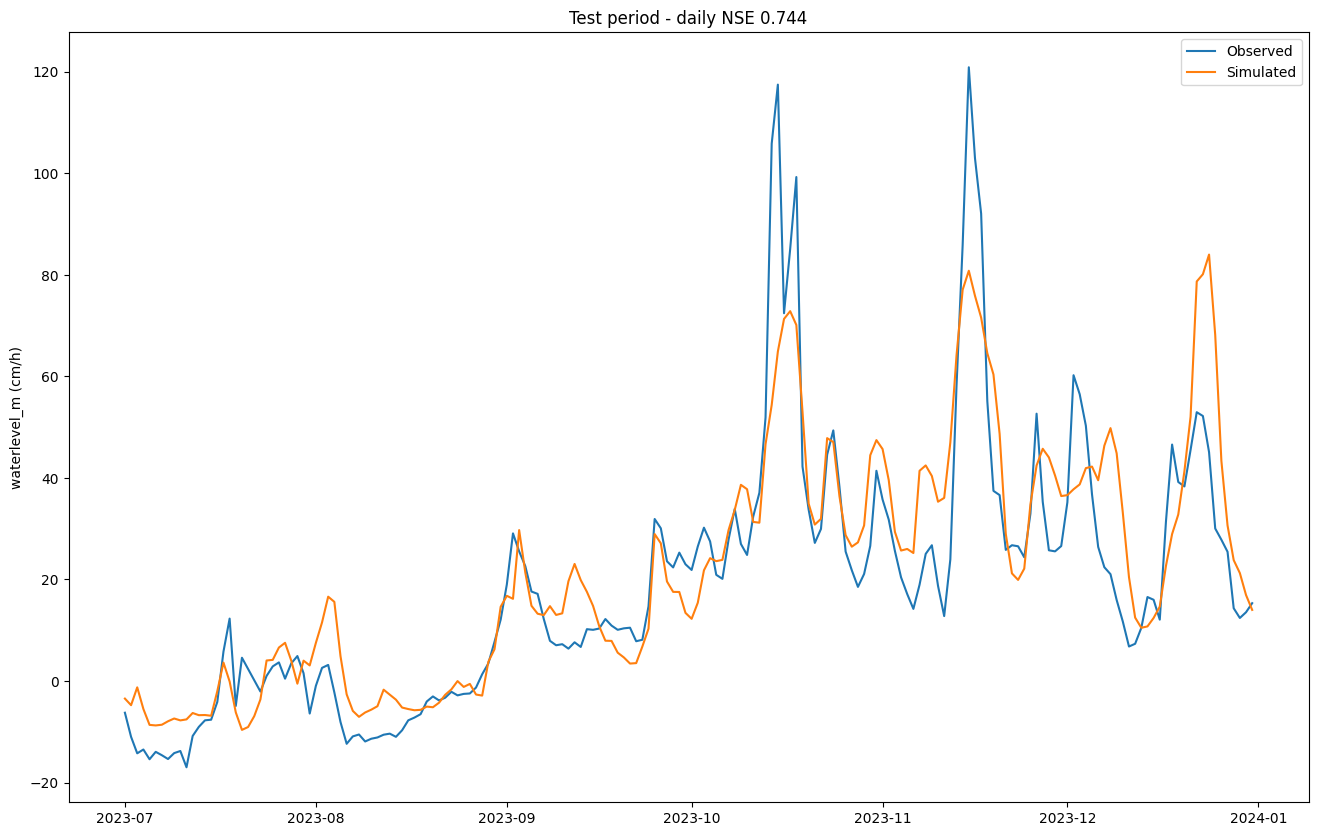

In [313]:
# extract observations and simulations
daily_qobs = results["camle"]["1D"]["xr"]["waterlevel_m_nldas_hourly_obs"]
daily_qsim = results["camle"]["1D"]["xr"]["waterlevel_m_nldas_hourly_sim"]

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(daily_qobs["date"], daily_qobs, label="Observed")
ax.plot(daily_qsim["date"], daily_qsim, label="Simulated")
ax.legend()
ax.set_ylabel("waterlevel_m (cm/h)")
ax.set_title(f"Test period - daily NSE {results['camle']['1D']['NSE_1D']:.3f}")
#ax.set_title("Test period - daily discharge")


# Calculate some metrics
values = metrics.calculate_all_metrics(daily_qobs.isel(time_step=-1), daily_qsim.isel(time_step=-1))
print("Daily metrics:")
for key, val in values.items():
    print(f"  {key}: {val:.3f}")

In [272]:
!python D:/DATN/neuralhydrology/neuralhydrology/neuralhydrology/nh_run.py evaluate --run-dir D:/DATN/runs/test_run_2306_180332 --period test --epoch 100

2025-06-24 00:12:31,704: Logging to D:\DATN\runs\test_run_2306_180332\output.log initialized.
2025-06-24 00:12:31,715: No specific hidden size for frequencies are specified. Same hidden size is used for all.
2025-06-24 00:12:31,731: Using the model weights from D:\DATN\runs\test_run_2306_180332\model_epoch100.pt

# Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]
                                                   
Metrics for 1h are calculated over last 24 elements only. Ignoring 24 predictions per sequence.

# Evaluation: 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]
2025-06-24 00:12:33,456: Stored metrics at D:\DATN\runs\test_run_2306_180332\test\model_epoch100\test_metrics.csv
2025-06-24 00:12:33,456: Stored results at D:\DATN\runs\test_run_2306_180332\test\model_epoch100\test_results.p


In [58]:
import pickle
import pandas as pd

# Đường dẫn đến file test
file_path = r"D:\DATN\runs\test_run_2306_180332\test\model_epoch100\test_results.p"

# Đọc file pickle
with open(file_path, "rb") as f:
    results = pickle.load(f)

# Kiểm tra các key để biết cấu trúc
print(results['camle'].keys())




dict_keys(['1h', '1D'])


In [316]:
print(results['camle']['1D'].keys())


dict_keys(['xr', 'MSE_1D', 'NSE_1D'])


In [317]:
xr_data = results['camle']['1D']['xr']
print(xr_data)


<xarray.Dataset> Size: 3kB
Dimensions:                        (date: 184, time_step: 1)
Coordinates:
  * date                           (date) datetime64[ns] 1kB 2023-07-01 ... 2...
  * time_step                      (time_step) int64 8B 0
Data variables:
    waterlevel_m_nldas_hourly_obs  (date, time_step) float32 736B -6.25 ... 1...
    waterlevel_m_nldas_hourly_sim  (date, time_step) float32 736B -3.467 ... ...


In [318]:
import pandas as pd

df = xr_data[["waterlevel_m_nldas_hourly_obs", "waterlevel_m_nldas_hourly_sim"]].to_dataframe().reset_index()
df.columns = ["date", "time_step", "observed", "simulated"]

# Lưu ra file CSV
df.to_csv(r"D:\DATN\runs\test_predictions_daily.csv", index=False)
